# DSP Project - Identifying Parking Spaces

By Aashish Kakar, Karthik Sudarshan, Mohd. Yunus, Raghavkrishna Ramakrishnan


As a part of our Project we want to identify open parking spaces vs car parked spaces. In computer vision image classification means the computer being able to differentiate between images.


In [10]:
import tensorflow,tensorboard
from tensorflow import GPUOptions
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import os,cv2
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## GPU Options and Settings

In [3]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.30)
sess = tf.Session(config=tf.ConfigProto(gpu_options = gpu_options))

## Datageneration and Preview of Image set

In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Please Make the following changes : 
1 Path to load Images - Line 1
2 Save Directory - Create a folder with the name preview (Line 8) and define the path to store the image. 

This code is not relevant to the model architecture as behind the Train and Validation generator these images are being 
generated at model runtime.

In [5]:
img = load_img('C://Users/aashi/OneDrive/Desktop/Image_set/Car_Parked.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='C://Users/aashi/OneDrive/Desktop/Image_set/previw/', save_prefix='car', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

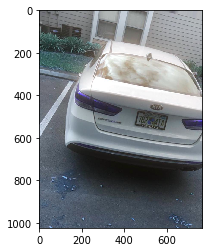

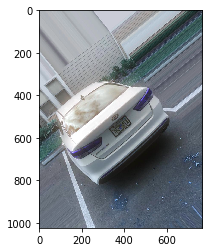

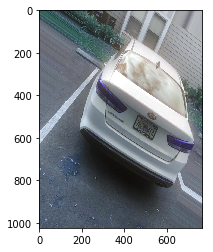

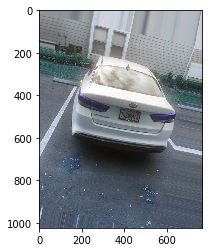

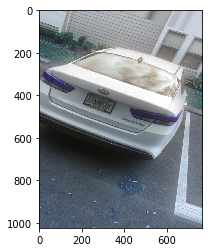

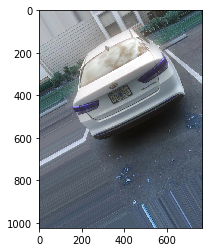

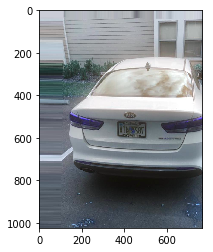

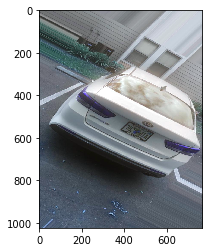

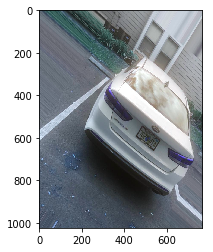

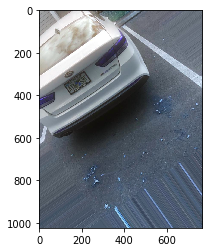

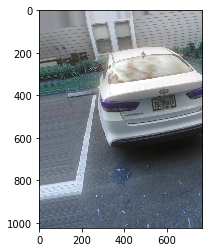

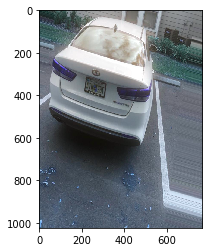

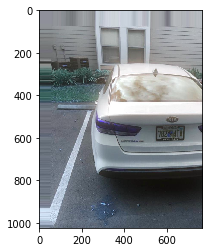

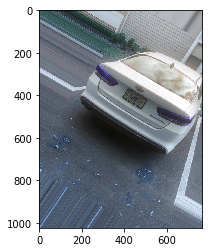

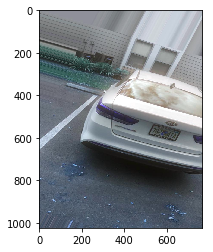

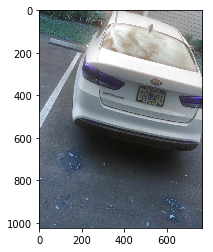

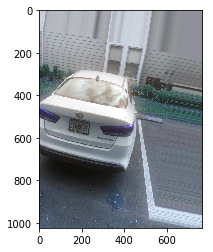

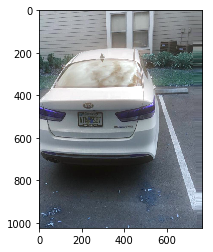

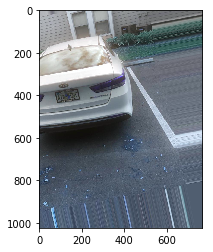

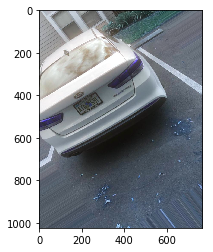

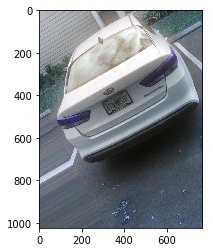

In [9]:
dir_preview = 'C://Users/aashi/OneDrive/Desktop/Image_set/previw/'
for img in os.listdir(dir_preview):
    img_array = cv2.imread(os.path.join(dir_preview,img))
    plt.imshow(img_array)
    plt.show()

## Model Architecture
//Changes//
1 Kindly define the path to logs(Preferrably where anaconda is installed.) line 13
2 Train Generator Path - Line 61
3 Test Generator Path - Line 68

In [5]:
##### import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPool2D,MaxPooling2D 

dense_layers =[1,2,3]
layer_sizes = [32,64,128]
conv_layers = [2,3,4]


for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-Conv-{}-Nodes-{}-Dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            print(NAME)
            tensorboard = TensorBoard(log_dir='C://Users/aashi/logs/{}'.format(NAME),write_grads=True)
            
            model = Sequential()
            model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for c in range(conv_layer-1):
                model.add(Conv2D(32, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            # the model so far outputs 3D feature maps (height, width, features)
            model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
            
            
            for d in range(dense_layer):
                model.add(Dense(64))
                model.add(Activation('relu'))
                model.add(Dropout(0.5))
            
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                          optimizer='rmsprop',
                          metrics=['accuracy'])
            
            
            batch_size = 16

            # this is the augmentation configuration we will use for training
            train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

            # this is the augmentation configuration we will use for testing:
            # only rescaling
            test_datagen = ImageDataGenerator(rescale=1./255)

            # this is a generator that will read pictures found in
            # subfolers of 'data/train', and generate
            # batches of augmented image data
            train_generator = train_datagen.flow_from_directory(
                    'C://Users/aashi/OneDrive/Desktop/Image_set/train/',  # this is the target directory
                    target_size=(150, 150),  # all images will be resized to 150x150
                    batch_size=batch_size,
                    class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

            # this is a similar generator, for validation data
            validation_generator = test_datagen.flow_from_directory(
                    'C://Users/aashi/OneDrive/Desktop/Image_set/Validation/',
                    target_size=(150, 150),
                    batch_size=batch_size,
                    class_mode='binary')

            model.fit_generator(
                    train_generator,
                    steps_per_epoch=2000 // batch_size,
                    validation_data=validation_generator,
                    validation_steps=800 // batch_size,
                    callbacks = [tensorboard])
            model.save_weights('{}_weights.h5'.format(NAME))  # always save your weights after training or during training
            model.save('{}.h5'.format(NAME))

2-Conv-32-Nodes-1-Dense-1555877581
Found 173 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Epoch 1/1
125/125 [==============================] - 401s 3s/step - loss: 0.4772 - acc: 0.7986 - val_loss: 0.3744 - val_acc: 0.7333
3-Conv-32-Nodes-1-Dense-1555877983
Found 173 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Epoch 1/1
125/125 [==============================] - 407s 3s/step - loss: 0.4278 - acc: 0.7908 - val_loss: 0.2182 - val_acc: 0.8667
4-Conv-32-Nodes-1-Dense-1555878391
Found 173 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Epoch 1/1
125/125 [==============================] - 408s 3s/step - loss: 0.4462 - acc: 0.7997 - val_loss: 0.1516 - val_acc: 0.9333
2-Conv-64-Nodes-1-Dense-1555878800
Found 173 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Epoch 1/1
125/125 [==============================] - 403s 3s/step - loss: 0.3962 - acc: 0.8342 - val_loss: 0.2070 - val_acc: 0.8667
3-Conv-6

In [27]:
train_generator.class_indices

{'car_in_parking': 0, 'open_parking': 1}

## Prediction 

Please change the path in imread in order to read the image of your choice in the below code. 

In [42]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('2-Conv-32-Nodes-2-Dense-1555881259.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aashi/OneDrive/Desktop/Image_set/Validation/car_in_parking/WhatsApp Image 2019-03-17 at 1.10.16 PM.jpeg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[[0]]


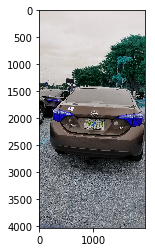

In [31]:
plt.imshow(cv2.imread('C://Users/aashi/OneDrive/Desktop/Image_set/car_in_parking/20190317_142954.jpg'))

In [43]:
img = cv2.imread('C://Users/aashi/OneDrive/Desktop/Image_set/Parking.jpeg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[[1]]


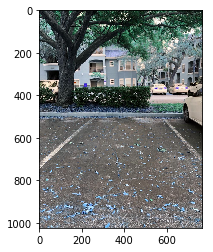

In [44]:
plt.imshow(cv2.imread('C://Users/aashi/OneDrive/Desktop/Image_set/Parking.jpeg'))